# ロジット関数

に入る前に・・・

## まずはオッズについて

ある事象が起こる確率を$p$とした場合、オッズは次のように計算します：

オッズ = $\frac{p}{1-p}$

つまり「起こる確率」を「起こらない確率」で割ったもので、具体的な例を挙げると

コインを投げて表が出る確率は$p = 0.5$なので、$odds = \frac{0.5}{1-0.5}$となりオッズは$1$になる。これは裏が１回出ると表も１回出るぐらいの比率と考えられる。

トランプ52枚のうち、1枚引いたらハートが出る確率は「四分の一」で$p = 0.25$なので、$odds = \frac{0.25}{0.75}$となりオッズは$0.333...$になる。これはハート以外が１回出るとハートが0.33回出るぐらいの比率、もしくはハート以外が３回出るとハートが１回出るぐらいの比率を表しています。

$p$は0~1の範囲なので、オッズの代表的な数値を表にしてみます。0と1にそれぞれ近い数値はいくつか多めに示しています。
0に近づくにつれ変化が細かくなり、1に近づくと変化が大きくなる性質があります。

| 確率 $( p )$ | オッズ $( \text{Odds} = \frac{p}{1-p} )$ |
|:------------:|:-------------------------------------:|
| 0.001          | 0.0.001001                                |
| 0.01          | 0.0101                                |
| 0.1          | 0.111                                |
| 0.2          | 0.250                                |
| 0.3          | 0.429                                |
| 0.4          | 0.667                                |
| 0.5          | 1.000                                |
| 0.6          | 1.500                                |
| 0.7          | 2.333                                |
| 0.8          | 4.000                                |
| 0.9          | 9.000                                |
| 0.99          | 99.000                                |
| 0.999          | 999.000                                |


さらにグラフにして可視化してみます。

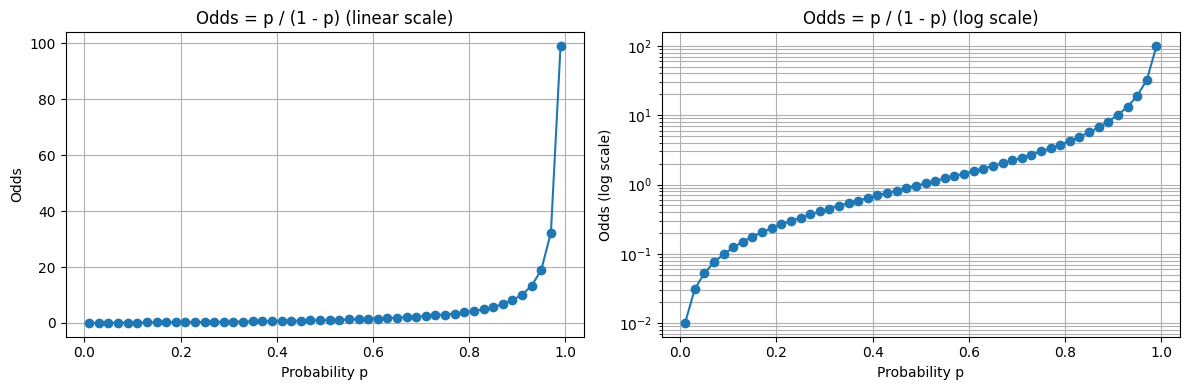

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 確率pの配列を用意 (0や1は除外: オッズが∞になるため)
p_values = np.linspace(0.01, 0.99, 50)

# 2. オッズを計算
#    オッズ = p / (1 - p)
odds_values = p_values / (1 - p_values)

# 3. 可視化 (サブプロットで左右に並べる)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ----- (A) 通常スケールでオッズを表示 ----- #
axes[0].plot(p_values, odds_values, marker='o')
axes[0].set_title('Odds = p / (1 - p) (linear scale)')
axes[0].set_xlabel('Probability p')
axes[0].set_ylabel('Odds')
axes[0].grid(True)

# ----- (B) 対数スケールでオッズを表示 ----- #
axes[1].plot(p_values, odds_values, marker='o')
axes[1].set_yscale('log')  # 縦軸を対数スケールにする
axes[1].set_title('Odds = p / (1 - p) (log scale)')
axes[1].set_xlabel('Probability p')
axes[1].set_ylabel('Odds (log scale)')
axes[1].grid(True, which='both')

plt.tight_layout()
plt.show()

左のグラフでは縦軸が通常のスケールで、$p=0.5$の時に$Odds = 1$になっていますが、$p < 0.5$の時は0~1の間に点が密集しているのが見えます。$p > 0.5$の場合は$p$が１に近づくと極端に$Odds$が増えています。

右のグラフでは縦軸が対数スケールで、やはり$p=0.5$の時に$Odds = 10^0 = 1$になっていますが、$p$が$0.5$より小さい場合と大きい場合のOddsの値がどのように10倍（10分の1）になって行くかが乗算的に可視化されています。この方が全体の性質をとらえやすいでしょう。

# ロジット関数

オッズを自然対数を用いて計算するとロジット関数になる。

$$
logit(p) = ln(\frac{p}{1-p})
$$

上のテーブルにロジット関数にマッピングした値を加えました。


| 確率 $( p )$ | オッズ $( \text{Odds} = \frac{p}{1-p} )$ | ロジット $( \ln(\frac{p}{1-p}) )$ |
|:------------:|:-------------------------------------:|:----------------------------------:|
| 0.001        | 0.001001                              | -6.907                            |
| 0.01         | 0.0101                                | -4.595                            |
| 0.1          | 0.111                                 | -2.197                            |
| 0.2          | 0.250                                 | -1.386                            |
| 0.3          | 0.429                                 | -0.847                            |
| 0.4          | 0.667                                 | -0.405                            |
| 0.5          | 1.000                                 |  0.000                            |
| 0.6          | 1.500                                 |  0.405                            |
| 0.7          | 2.333                                 |  0.847                            |
| 0.8          | 4.000                                 |  1.386                            |
| 0.9          | 9.000                                 |  2.197                            |
| 0.99         | 99.000                                |  4.595                            |
| 0.999        | 999.000                               |  6.907                            |


確率$p$からオッズ、そしてオッズからロジット関数の結果までの変換が分かようにグラフで可視化します。


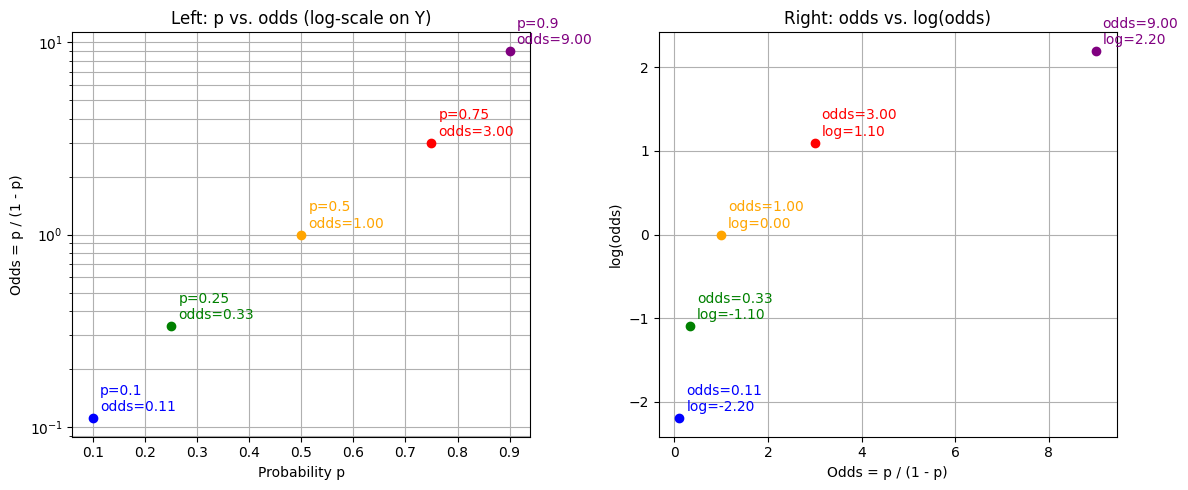

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 代表的なpをリストで定義
p_samples = [0.1, 0.25, 0.5, 0.75, 0.9]

# 2. オッズ (p/(1-p)) と ログオッズ (log(odds)) を計算
odds_list = [p/(1-p) for p in p_samples]
log_odds_list = [np.log(o) for o in odds_list]

# 3. カラーやマーカーを指定 (必要に応じて増やせます)
colors = ['blue', 'green', 'orange', 'red', 'purple']

# 4. サブプロットを準備
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# -----------------------------
# 左側: x=p, y=odds (logスケール)
# -----------------------------
ax_left = axes[0]
ax_left.set_title("Left: p vs. odds (log-scale on Y)")
ax_left.set_xlabel("Probability p")
ax_left.set_ylabel("Odds = p / (1 - p)")
ax_left.set_yscale('log')  # 縦軸を対数スケールに
ax_left.grid(True, which='both')

# 各点を描画
for i, p in enumerate(p_samples):
    odds_val = odds_list[i]
    color = colors[i % len(colors)]
    ax_left.plot(p, odds_val, marker='o', color=color)
    # 注釈ラベル: oddsの値を表示 (お好みでpも表示可)
    ax_left.annotate(f"p={p}\nodds={odds_val:.2f}", 
                     xy=(p, odds_val), 
                     xytext=(5, 5), textcoords='offset points',
                     color=color)

# -----------------------------
# 右側: x=odds, y=log(odds)
# -----------------------------
ax_right = axes[1]
ax_right.set_title("Right: odds vs. log(odds)")
ax_right.set_xlabel("Odds = p / (1 - p)")
ax_right.set_ylabel("log(odds)")
ax_right.grid(True)

# 各点を描画
for i, odds_val in enumerate(odds_list):
    lo = log_odds_list[i]
    color = colors[i % len(colors)]
    ax_right.plot(odds_val, lo, marker='o', color=color)
    # 注釈ラベル: log(odds)の値を表示
    ax_right.annotate(f"odds={odds_val:.2f}\nlog={lo:.2f}",
                      xy=(odds_val, lo),
                      xytext=(5, 5), textcoords='offset points',
                      color=color)

plt.tight_layout()
plt.show()


左のグラフは確率$p$（横軸）と$odds = \frac{p}{1-p}$（縦軸、対数スケール）を示しています。縦軸は対数スケールなので、直線に見えても実は指数関数的に増加するのが分かります（積を和として見ていることになるので）

右のグラフは$odds$（横軸）と$ln(odds)$（縦軸）として表しています。縦横のアスペクトレシオが１：１のグラフなので、典型的な対数関数のグラフの形（入力が大きくなるにつれ出力が飽和していく）になっているのが分かります。

サンプルデータは色分けされているので変換の様子を追跡できます。

# 確率$p$をロジット関数で実数に変換する目的

確率$p$は0~1の範囲の値を取り、マイナスの値がないという「制約」がある。そこでロジット関数を使って$-\infty$～$+\infty$の範囲を取る、オッズの自然対数の値に変換して「非線形空間から線形空間」へとマッピングします。実数として表すことで線形結合や線形モデルを適用できるようになる。

ロジットと線形モデルの等価性により、ロジスティック回帰などでの線形結合に適用しやすい。線形結合の計算 $ z = w^T x + b$ で得られる結果$z$は、確率$p$のロジット$logit(p)$ で得られる結果と同じなので、線形空間で重み$w$やバイアス$b$を最適化するといった操作（訓練）が可能になる。
